Import library yang dibutuhkan

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Persiapan Gambar

In [ ]:
# Kita pakai 'wget' untuk download gambar sampel langsung
# Ini gambar 'smarties.png' yang klasik dari sampel OpenCV
!wget https://raw.githubusercontent.com/opencv/opencv/4.x/samples/data/smarties.png -O smarties.png

--2025-10-26 14:01:31--  https://raw.githubusercontent.com/opencv/opencv/4.x/samples/data/smarties.png
Loaded CA certificate '/usr/ssl/certs/ca-bundle.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90815 (89K) [image/png]
Saving to: 'smarties.png'

     0K .......... .......... .......... .......... .......... 56% 1.60M 0s
    50K .......... .......... .......... ........             100% 5.90M=0.04s

2025-10-26 14:01:31 (2.34 MB/s) - 'smarties.png' saved [90815/90815]



In [4]:
# Tentukan nama file gambar kita
nama_file_gambar = 'smarties.png'

# Baca gambar menggunakan OpenCV
gambar_asli = cv2.imread(nama_file_gambar)

# Buat salinan gambar untuk hasil deteksi
gambar_hasil = gambar_asli.copy()

Pre-processing

In [5]:
# Fungsi HoughCircles butuh gambar grayscale
gambar_gray = cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2GRAY)

# Kita beri sedikit blur untuk mengurangi noise
# Ini membantu detektor agar tidak salah mendeteksi lingkaran palsu
# MedianBlur bagus untuk noise 'bintik-bintik'
gambar_blur = cv2.medianBlur(gambar_gray, 5)

Deteksi Lingkaran

In [6]:
lingkaran_terdeteksi = cv2.HoughCircles(
    gambar_blur, 
    cv2.HOUGH_GRADIENT, 
    dp=1, 
    minDist=20, 
    param1=50, 
    param2=30, 
    minRadius=1, 
    maxRadius=50
)

Visualisasi Hasil

In [7]:
# Pastikan kita beneran nemu lingkaran
if lingkaran_terdeteksi is not None:
    
    # Konversi koordinat dan radius ke integer
    lingkaran_terdeteksi = np.uint16(np.around(lingkaran_terdeteksi))
    
    print(f"Berhasil mendeteksi {len(lingkaran_terdeteksi[0, :])} lingkaran!")
    
    # Loop semua lingkaran yang terdeteksi
    for lingkaran in lingkaran_terdeteksi[0, :]:
        # Ambil koordinat pusat (x, y) dan radius (r)
        x_tengah = lingkaran[0]
        y_tengah = lingkaran[1]
        radius = lingkaran[2]
        
        # --- Menggambar di 'gambar_hasil' ---
        
        # 1. Gambar outline lingkaran (warna hijau, tebal 2 piksel)
        cv2.circle(gambar_hasil, (x_tengah, y_tengah), radius, (0, 255, 0), 2)
        
        # 2. Gambar titik pusat lingkaran (warna merah, tebal 3 piksel)
        cv2.circle(gambar_hasil, (x_tengah, y_tengah), 1, (0, 0, 255), 3)

else:
    print("Tidak ada lingkaran yang terdeteksi dengan parameter ini.")

Berhasil mendeteksi 12 lingkaran!


Tampilkan Hasil Deteksi

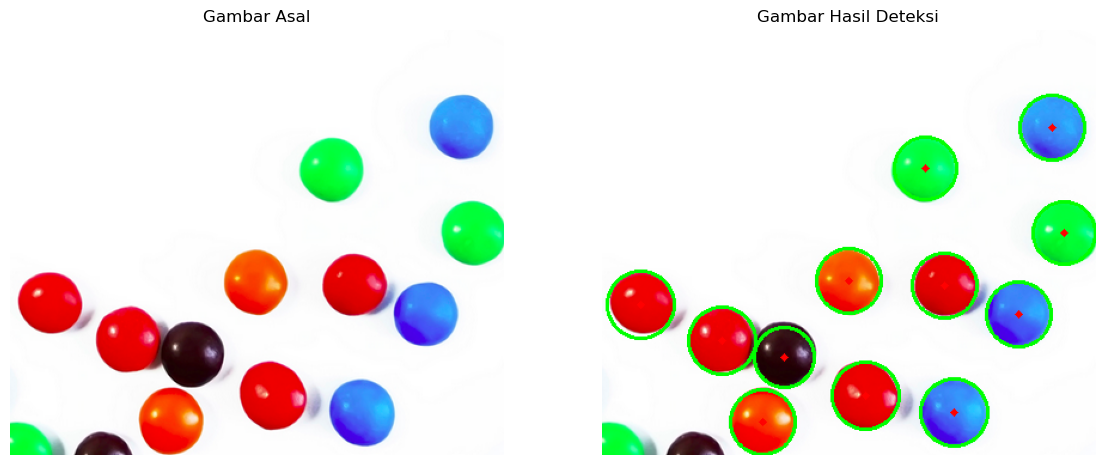

In [10]:
# OpenCV pakai format BGR, tapi Matplotlib (untuk display) pakai RGB
# Jadi kita konversi dulu warnanya
gambar_asli_rgb = cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB)
gambar_hasil_rgb = cv2.cvtColor(gambar_hasil, cv2.COLOR_BGR2RGB)

# Siapkan kanvas untuk plotting
plt.figure(figsize=(14, 7))

# Plot 1: Gambar Asal
plt.subplot(1, 2, 1)
plt.title('Gambar Asal')
plt.imshow(gambar_asli_rgb)
plt.axis('off')  # Hilangkan sumbu x/y

# Plot 2: Gambar Hasil Deteksi
plt.subplot(1, 2, 2)
plt.title('Gambar Hasil Deteksi')
plt.imshow(gambar_hasil_rgb)
plt.axis('off')  # Hilangkan sumbu x/y

# Tampilkan kedua gambar
plt.show()